In [1]:
import numpy as np
import pandas as pd

from processing import process_embedding_from_words
from taxonomy import (phi_edge, build_state, proba_state, TaxonomyModule,
                    plot_state_likelihood_and_gradient, plot_nx_graph)

%load_ext autoreload
%autoreload 2

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\charb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Training data

""" train_words = [
    "vertebrate", "mammal", "placental", "cow", "rodent", "rat", "metatherian",
    "marsupial", "kangaroo", "reptile", "diapsid", "squirrel", "snake",
    "crocodilian", "anapsid", "chelonian", "turtle"
] """


# Curated
train_words = [
    "vertebrate", "mammal", "placental", "cow", "rodent", "rat",
    "marsupial", "kangaroo", "reptile", "diapsid", "squirrel", "snake",
    "crocodilian", "turtle"
]

train_embedd = process_embedding_from_words(train_words)

INFO:wikipediaapi:Request URL: https://en.wikipedia.org/w/api.php?action=query&prop=extracts&titles=vertebrate&explaintext=1&exsectionformat=wiki
INFO:wikipediaapi:Request URL: https://en.wikipedia.org/w/api.php?action=query&prop=extracts&titles=mammal&explaintext=1&exsectionformat=wiki
INFO:wikipediaapi:Request URL: https://en.wikipedia.org/w/api.php?action=query&prop=extracts&titles=placental&explaintext=1&exsectionformat=wiki
INFO:wikipediaapi:Request URL: https://en.wikipedia.org/w/api.php?action=query&prop=extracts&titles=cow&explaintext=1&exsectionformat=wiki
INFO:wikipediaapi:Request URL: https://en.wikipedia.org/w/api.php?action=query&prop=extracts&titles=rodent&explaintext=1&exsectionformat=wiki
INFO:wikipediaapi:Request URL: https://en.wikipedia.org/w/api.php?action=query&prop=extracts&titles=rat&explaintext=1&exsectionformat=wiki
INFO:wikipediaapi:Request URL: https://en.wikipedia.org/w/api.php?action=query&prop=extracts&titles=marsupial&explaintext=1&exsectionformat=wiki
IN

In [3]:
train_df_graph = pd.DataFrame(index=train_words, columns=train_words)

train_df_graph.loc["vertebrate", "mammal"] = 1
train_df_graph.loc["vertebrate", "reptile"] = 1
train_df_graph.loc["mammal", "placental"] = 1
# train_df_graph.loc["mammal", "metatherian"] = 1
train_df_graph.loc["placental", "cow"] = 1
train_df_graph.loc["placental", "rodent"] = 1
train_df_graph.loc["rodent", "squirrel"] = 1
train_df_graph.loc["rodent", "rat"] = 1
# train_df_graph.loc["metatherian", "marsupial"] = 1
train_df_graph.loc["marsupial", "kangaroo"] = 1
train_df_graph.loc["reptile", "diapsid"] = 1
# train_df_graph.loc["reptile", "anapsid"] = 1
train_df_graph.loc["diapsid", "snake"] = 1
train_df_graph.loc["diapsid", "crocodilian"] = 1
# train_df_graph.loc["anapsid", "chelonian"] = 1
# train_df_graph.loc["chelonian", "turtle"] = 1

# Correction
train_df_graph.loc["reptile", "turtle"] = 1
train_df_graph.loc["mammal", "marsupial"] = 1

train_df_graph = train_df_graph.fillna(0)
train_df_graph.head()

,vertebrate,mammal,placental,cow,rodent,rat,marsupial,kangaroo,reptile,diapsid,squirrel,snake,crocodilian,turtle
vertebrate,0,1,0,0,0,0,0,0,1,0,0,0,0,0
mammal,0,0,1,0,0,0,1,0,0,0,0,0,0,0
placental,0,0,0,1,1,0,0,0,0,0,0,0,0,0
cow,0,0,0,0,0,0,0,0,0,0,0,0,0,0
rodent,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [4]:
w = np.random.randn(train_embedd.shape[-1] + 1)
phi_edge(0, 1, w, train_embedd, y=1), phi_edge(0, 1, w, train_embedd, y=0)

(0.5973054217661962, 1)

In [5]:
w = np.random.randn(train_embedd.shape[-1] + 1)
train_state = build_state(train_words, train_df_graph)
proba_state(w, train_state, train_words, train_embedd)

-466.5486780879393

In [6]:
dim_embedding = train_embedd.shape[-1]
proba_state(np.zeros(dim_embedding+1), train_state, train_words, train_embedd), (len(train_words)**2 - len(train_words))*np.log(0.5)

(-126.15278686191026, -126.15278686191004)

### Plots


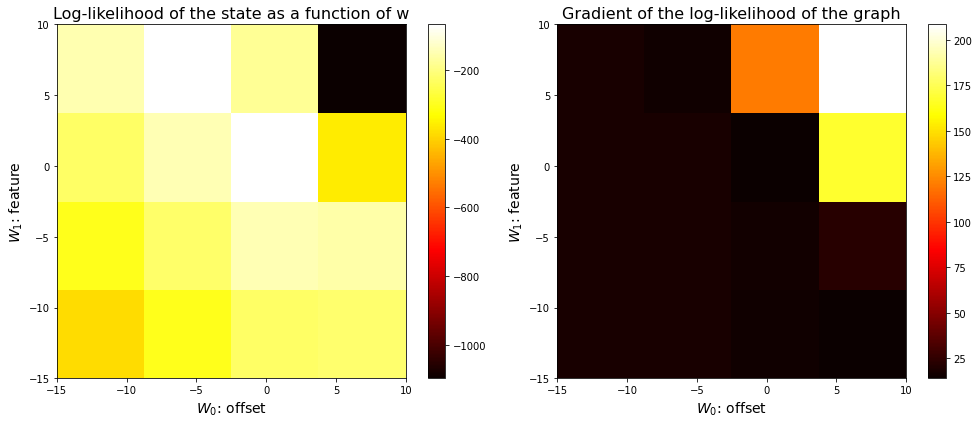

In [7]:
W_X, W_Y = np.meshgrid(np.linspace(-15, 10, 5), np.linspace(-15, 10, 5))

plot_state_likelihood_and_gradient(
    train_state, train_words, train_embedd, W_X, W_Y)

## Visualization

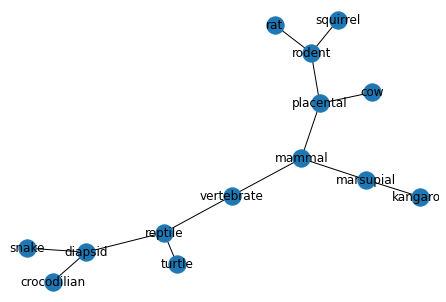

In [8]:
plot_nx_graph(w=np.array([-3, 6]), words=train_words, embedding=np.array(train_df_graph));

### Training procedure

In [9]:
taxonomy_module = TaxonomyModule()

In [10]:
""" nb_epochs = 50
# lr = None : uses nevergrad
taxonomy_module.train(train_df_graph, nb_epochs, lr=None) """

' nb_epochs = 50\n# lr = None : uses nevergrad\ntaxonomy_module.train(train_df_graph, nb_epochs, lr=None) '

In [12]:
%debug
nb_epochs = 20
lr = 0.01
taxonomy_module.train(train_df_graph, nb_epochs, lr=lr)

> <__array_function__ internals>(5)dot()

> c:\users\charb\google drive\mva\second semestre\graphical models discrete inference\taxonomy_project\taxonomy-project\taxonomy.py(23)phi_edge()
     21         # add offset to features at the beginning
     22         features = np.append(1, embedding[i, j])
---> 23         return np.exp(np.dot(w, features))
     24     else:
     25         return 1

104
> c:\users\charb\google drive\mva\second semestre\graphical models discrete inference\taxonomy_project\taxonomy-project\taxonomy.py(44)<listcomp>()
     42             node_V = Node(name_V, "V", nb_states=2)
     43             dic_nodes[name_V] = node_V
---> 44             dist = np.array([phi_edge(i, j, w, embedding, y) for y in [0, 1]])
     45             name_F = f"F_{wordi}_{wordj}"
     46             node_F = Node(name_F, "F", dist=dist, dist_index=[name_V])

*** SyntaxError: unexpected EOF while parsing
104
> c:\users\charb\google drive\mva\second semestre\graphical models discrete 

ValueError: shapes (104,) and (103,) not aligned: 104 (dim 0) != 103 (dim 0)

In [16]:
taxonomy_module.w # -

array([ 0.1204606 ,  1.2934774 ,  0.08559979, -0.64460528, -1.11431282,
        0.06979567,  0.3411396 ,  1.21523349, -1.67311476, -0.83327563,
       -1.84583357,  0.47996253, -0.97461208, -0.19102112, -0.07319905,
       -0.60805491, -0.46025853, -1.22731688,  0.57610192,  0.40370263,
        0.89765777,  1.77891312,  0.12358193, -1.17190393, -0.4996023 ,
       -1.18363793, -0.3487201 ,  0.58135098, -3.06322495,  0.00316505,
       -1.33546464,  0.19663656, -0.29555884,  0.05696124, -0.29344929,
        0.2075852 ,  0.08693267, -0.11226674, -0.49498112, -0.31717468,
        0.24540085, -0.23143379, -1.18525829,  0.60935728, -1.15110828,
       -1.28419773, -2.26377199,  0.25966192,  0.34974761, -0.50034494,
        1.75860609, -1.46963375, -0.3341176 , -1.90664905, -0.07230343,
       -0.6729267 , -1.07944319, -0.86099177, -0.20305886, -1.70566687,
        0.8770927 ,  0.33409661,  0.2407172 ,  0.37218202, -0.2484624 ,
       -0.60150198, -0.6349206 ,  1.46336105, -0.57145967,  0.72

In [39]:
taxonomy_module.f1_score(train_df_graph)

Embedding already charged


0.1176470537716265

Embedding already charged
V_vertebrate_mammal 0.08273149144047932
V_vertebrate_placental 0.2012775557598071
V_vertebrate_cow 0.0703378417314991
V_vertebrate_rodent 0.07969062461022448
V_vertebrate_rat 0.050972381217083765
V_vertebrate_metatherian 0.11536901640679639
V_vertebrate_marsupial 0.04500679330218488
V_vertebrate_kangaroo 0.04935169028956555
V_vertebrate_reptile 0.037422047002520435
V_vertebrate_diapsid 0.06272143666749957
V_vertebrate_squirrel 0.0373856331033894
V_vertebrate_snake 0.09038416988995995
V_vertebrate_crocodilian 0.08751679339528406
V_vertebrate_anapsid 0.11536901640679639
V_vertebrate_chelonian 0.11536901640679639
V_vertebrate_turtle 0.14837578444634497
V_mammal_vertebrate 0.033666622300026885
V_mammal_placental 0.4706864768743946
V_mammal_cow 0.2107232532341502
V_mammal_rodent 0.2340435726868226
V_mammal_rat 0.15933102829069448
V_mammal_metatherian 0.3151621570606996
V_mammal_marsupial 0.14258902422023914
V_mammal_kangaroo 0.15482710153197976
V_mammal_reptile 0.1

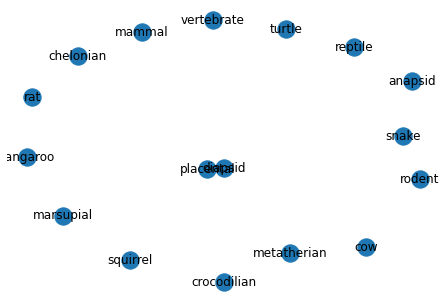

In [35]:
taxonomy_module.infer_graph(train_words, verbose=True);

Loading world2vec model...
Loaded.
List of world not in world2vec: {'metatherian', 'chelonian', 'anapsid'}


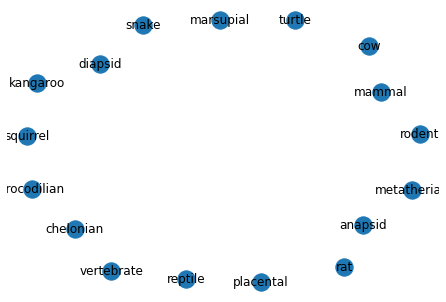

In [13]:
taxonomy_module.infer_graph(train_df_graph);

### Kirchhoff’s Matrix Tree Theorem (MTT)

In [14]:
from networkx.linalg.laplacianmatrix import laplacian_matrix
L_matrix = laplacian_matrix(G).todense()
nb_covering_trees = np.linalg.det(L_matrix[1:,1:])
nb_covering_trees

NameError: name 'G' is not defined

## Gensim Tests

In [3]:
import gensim.downloader as api
corpus = api.load('text8')
print(api.load('glove-wiki-gigaword-50', return_path=True))

[==================================================] 100.0% 31.6/31.6MB downloaded
[==================================================] 100.0% 66.0/66.0MB downloaded
C:\Users\charb/gensim-data\glove-wiki-gigaword-50\glove-wiki-gigaword-50.gz


In [9]:
model = api.load("glove-wiki-gigaword-50")

In [12]:
model.word_vec("cat").shape

(50,)